In [1]:
using DataFrames 

In [2]:
using CSV

In [3]:
using PyCall

In [4]:
using Plots

In [5]:
using StatsBase

### Conjunto 1 de tweets

In [6]:
df = DataFrame(CSV.File("set_1.csv"))
#df = DataFrame(CSV.File("ruby_set_1.csv"))

first(df.texto, 5)

5-element WeakRefStrings.StringVector{String}:
 "@exigenciacarp @labrunismomillo pancho, el papa le dijo puto una vez por ir a la psicopedagoga, y le recordo que en su epoca no existia eso. dice que le gusta el futbol pero es tan infeliz que critica a un jugador retirado porque le molesta que algunos lo recuerdan con alegría."
 "@sc_espn si no tienes como ver los partido por tv de tu equipo favorito de la seriaa, mandanos un msj 📩 y te diremos como verlo solo necesitas un celular 📳 e internet el fútbol es de todos, no solo de los que pueden pagar cable. 🙌✌️"
 "@corona_futbol medio pelo igual 😂"
 "pobre vicuña lo q más me duele es que se le ría por jugar mal al fútbol 😔"
 "jajajajaj le va a sacar hasta las ganas de jugar al fútbol https://t.co/rpg1or21ck"

In [181]:
#df2.fecha

In [97]:
#df.usuario

In [7]:
py"""
import re
def limpiar(t):
        emoji_pattern = re.compile(pattern = "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"
                               "]+", flags = re.UNICODE)


        t = re.sub(emoji_pattern,r'',t)

        return t
            


"""

In [8]:
function limpiar_tweet(str)
    
    url = r"http\S+"
    t = replace(str, url => "")

    hashtag = r"#\S+" 
    t = replace(t, hashtag => "")
    #show(r)

    arroba =  r"@\S+" 
    t = replace(t, arroba => "")

    numero = r"\d"
    t = replace(t, numero => "")

    enter = r"\n"
    t = replace(t, enter => "")

    no_palabra = r"\W"
    t = replace(t, no_palabra => " ")
    
    #llamando a funcion en python
    t = py"limpiar"(t)
    
    t = lowercase(t) 
    return t
end

    

limpiar_tweet (generic function with 1 method)

In [9]:
#frecuencia de palabras.....
function graficar(arr)
    
    #frecuencia del arreglo
    diccionario = countmap(arr)
    diccionario = sort(diccionario, byvalue=true, rev=true)
    
    dict = Dict()

    
    #top 10
    i = 1
    for (key, value) in diccionario
        dict[key] = value
        if i == 10
            break
        end 

        i=i+1
    end
    
    #ordenando por frecuencia el diccionario
    dict = sort(dict, byvalue=true, rev=true)

    #return dict
    
    #grafico
    bar(collect(keys(dict)), collect(values(dict)), orientation=:vertical)

    
end

graficar (generic function with 1 method)

In [10]:
function pocoSignificativo(arr)
   aux = []
    
    palabras = ["cuando","solo","este","para","cómo","como","pero","todo", "esta", "está", "todos", "todas", "ellos", "ellas", "ella"]
    
    for i in eachindex(arr)
        
        
        if (length(arr[i]) > 3 ) && !( arr[i] in palabras)
            push!(aux, arr[i])
        end
    end
        
    return aux
  
end

pocoSignificativo (generic function with 1 method)

In [12]:
#pasando tweets a palabras sueltas

set1 =[]

for x = 1:length(df[:,1]) 
    str = limpiar_tweet( df[x,:].texto )
    arreglo = split(str)
    arreglo = pocoSignificativo(arreglo)
    append!(set1, arreglo)
    
end

#set1

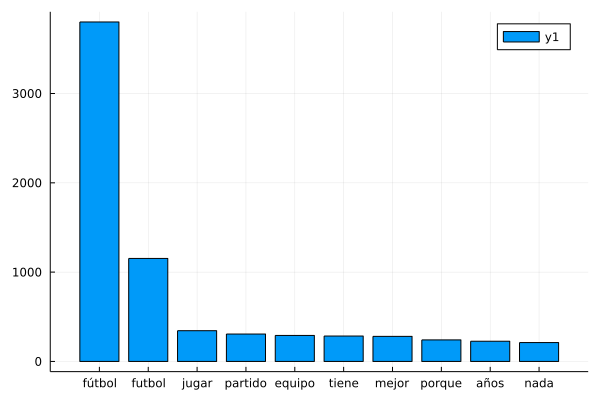

In [13]:
graficar(set1)

### Conjunto 2 de tweets

In [14]:
#df2 = DataFrame(CSV.File("ruby_set_2.csv"))
df2 = DataFrame(CSV.File("set_2.csv"))

first(df2.texto, 5)

5-element WeakRefStrings.StringVector{String}:
 "@xbxmrll @gueryjavier20 @gestionpe jajajjajajajajaja que idiota eres hijito, te ahoga  la ignorancia, de ser efectiva la vacuna, el vacunado actúa sobre el virus con los anticuerpos ya creados, y así atenúa la infección, es decir si es tan efectiva tu vacuna no tendría porque provocar muerte en otro..borrego"
 "maldita vacuna"
 "el fin de semana lo vacuna de tiro libre, guarden el tweet https://t.co/ykqxegldxx"
 "dioss vacuna de mierrda"
 "#platita eso es lo que te da @alferdez si perdes un familiar x vacunarlo.  te recuerdo que de 3 a 11 años ponen sinopharm, vacuna no autorizada x oms. vas a llevar a tus hijos???"

In [15]:
#pasando tweets a palabras sueltas

set2 =[]

for x = 1:length(df2[:,1]) 
    str = limpiar_tweet( df2[x,:].texto )
    arreglo = split(str)
    arreglo = pocoSignificativo(arreglo)
    append!(set2, arreglo)
    
end

set2

212614-element Vector{Any}:
 "jajajjajajajajaja"
 "idiota"
 "eres"
 "hijito"
 "ahoga"
 "ignorancia"
 "efectiva"
 "vacuna"
 "vacunado"
 "actúa"
 "sobre"
 "virus"
 "anticuerpos"
 ⋮
 "tienes"
 "caco"
 "vacaciones"
 "piensa"
 "quieras"
 "ñame"
 "extensiones"
 "silenciada"
 "ñame"
 "típico"
 "anti"
 "vacuna"

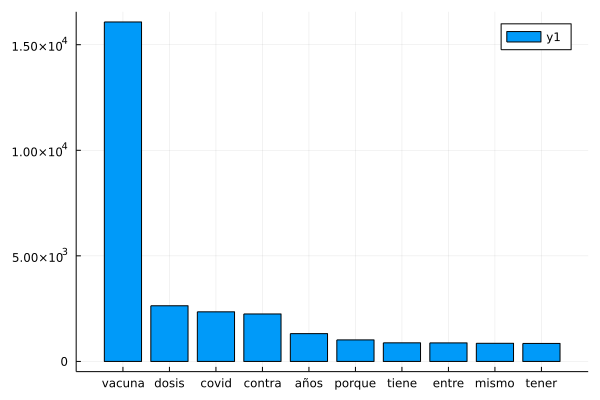

In [16]:
graficar(set2)

### Union de conjuntos

In [26]:
set_union = []
append!(set_union, set1)
append!(set_union, set2)
set_union

279991-element Vector{Any}:
 "pancho"
 "papa"
 "dijo"
 "puto"
 "psicopedagoga"
 "recordo"
 "epoca"
 "existia"
 "dice"
 "gusta"
 "futbol"
 "infeliz"
 "critica"
 ⋮
 "tienes"
 "caco"
 "vacaciones"
 "piensa"
 "quieras"
 "ñame"
 "extensiones"
 "silenciada"
 "ñame"
 "típico"
 "anti"
 "vacuna"

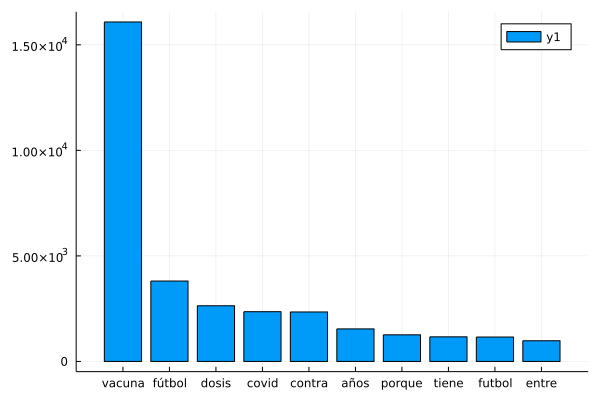

In [18]:
graficar(set_union)

### Interseccion de conjuntos

In [22]:
interseccion = intersect(set1,set2)

6094-element Vector{Any}:
 "papa"
 "dijo"
 "puto"
 "dice"
 "gusta"
 "futbol"
 "infeliz"
 "critica"
 "jugador"
 "porque"
 "molesta"
 "algunos"
 "recuerdan"
 ⋮
 "tontería"
 "prioritario"
 "segundas"
 "lindas"
 "irrelevantes"
 "grifo"
 "cercano"
 "alfredo"
 "giménez"
 "colonia"
 "temprana"
 "confeso"

In [23]:
frecuencia_union = countmap(set_union)

interseccion_dup = []

#se toma la frecuencia de la union para las palabras en la interseccion
for (key, value) in frecuencia_union
        
        #si la palabra esta en la interseccion
        if key in interseccion
            arr = []
            arr = fill(key,value) #inserta "key" en el array unas "value" veces 
            append!(interseccion_dup, arr)
            
        end 
end

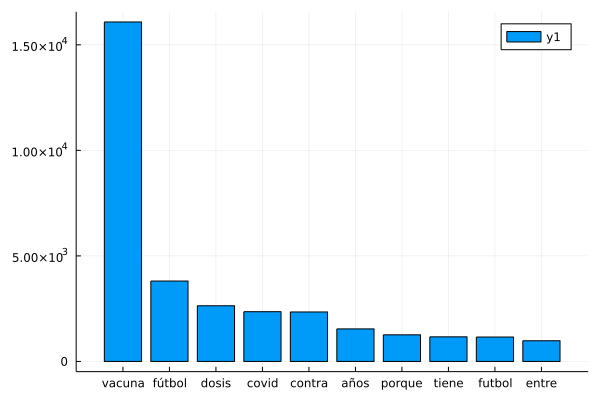

In [24]:
graficar(interseccion_dup)

### Diferencia de conjuntos

In [25]:
diferencia = setdiff(set1, set2)

8634-element Vector{Any}:
 "pancho"
 "psicopedagoga"
 "recordo"
 "epoca"
 "existia"
 "retirado"
 "seriaa"
 "mandanos"
 "diremos"
 "cable"
 "vivió"
 "artigas"
 "piqué"
 ⋮
 "desproporcionads"
 "conchillas"
 "ancap"
 "fenix"
 "crió"
 "pistas"
 "practicó"
 "vestir"
 "cittadella"
 "women"
 "véneto"
 "milita"

In [28]:

#concaetenar dataframes y solo mantener los datos unicos...
df_total = vcat(df, df2) #concatenacion vertical
df_fechas = unique(df_total)#datos unicos

#no anda.... no se porque.. UndefVarError: Not not defined

#df_fechas = select(df_fechas, Not(:texto))#elimina columna texto
#df_fechas = select(df_fechas, Not(:usuario))#elimina usuario


#se obtiene las fechas del dataframe
fechas_aux = []


#se empieza en 2 poeque el 1 es el titulo
for x = 2:length(df_fechas[:,1]) 
   
    fecha = df_fechas[x,:].fecha
    push!(fechas_aux, fecha)
 
end



In [30]:
str = split(fechas_aux[1])
str[1]

"2021-10-18"

In [31]:

#obetiendo solo la fecha y no la hora....
fechas = []

for x=1:length(fechas_aux)
    str = split(fechas_aux[x])
    push!(fechas, str[1])
end

fechas

20992-element Vector{Any}:
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 ⋮
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"

### Numero de tweets por fecha

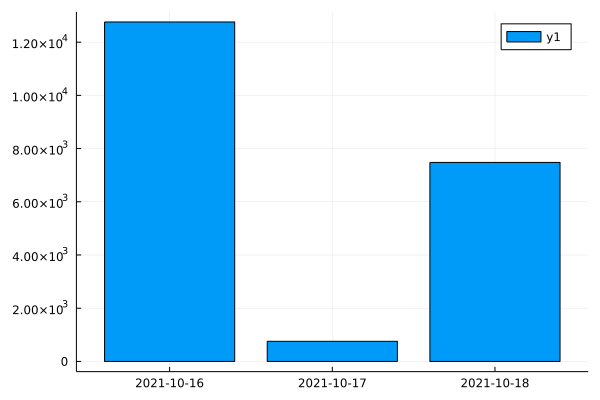

In [60]:
##grafico de las fechas

dicc_fechas = countmap(fechas) #diccionario

fecha = []
frecuencia = []
#ordenar por fecha

for key in sort!(collect(keys(dicc_fechas)))
           val = dicc_fechas[key]
            push!(fecha, key)
            push!(frecuencia, val)
            
end

d
bar(fecha, frecuencia, orientation=:vertical)


### Nro de usuarios diferentes por fecha

In [63]:
usuarios_fecha_df = unique(df_total,[2,3])#fecha con usuario unico
#show("")

unique!(usuarios_fecha_df)#fecha con usuario unico

usuarios_fecha_df = usuarios_fecha_df[:,2] #elimina col 1 y 3

nro_usuarios_fecha = []

#se empieza en 2 poeque el 1 es el titulo
for x = 2:length(usuarios_fecha_df[:,1]) 
   
    
    fecha_aux = df_fechas[x,:].fecha
    f = split(fecha_aux)
    push!(nro_usuarios_fecha, f[1])
 
end

nro_usuarios_fecha

20970-element Vector{Any}:
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 "2021-10-18"
 ⋮
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"
 "2021-10-16"

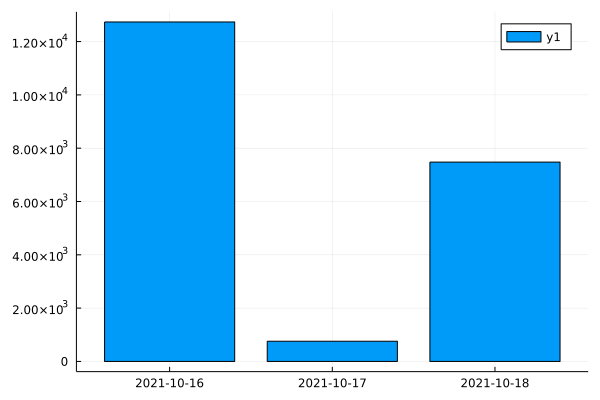

In [64]:

dicc_nro_usuarios_fechas = countmap(nro_usuarios_fecha) #diccionario

fecha = []
frecuencia = []
#ordenar por fecha

for key in sort!(collect(keys(dicc_nro_usuarios_fechas)))
           val = dicc_nro_usuarios_fechas[key]
            push!(fecha, key)
            push!(frecuencia, val)
            
end

bar(fecha,frecuencia, orientation=:vertical)

### Usuarios que mas tuitearon

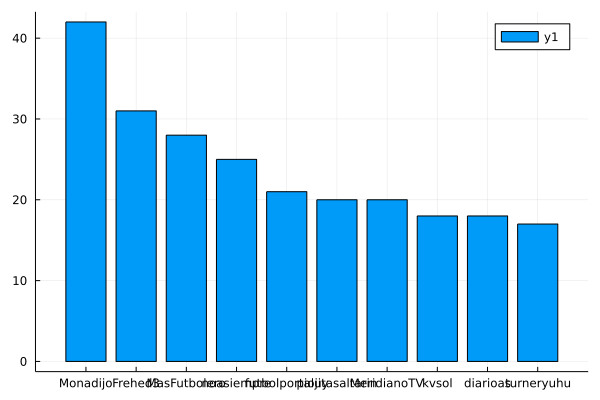

In [37]:
#usuarios_df = unique(df_union,[2,3])#fecha con usuario unico
usuarios_df = df_total[:,3] #recupera solo columna 3, de usuario

#desde el 2 porque 1 es el titulos
usuarios_df = usuarios_df
graficar(usuarios_df)

https://en.wikibooks.org/wiki/Introducing_Julia/Arrays_and_tuples

https://juliastats.org/StatsBase.jl/stable/


https://riptutorial.com/regex

https://scls.gitbooks.io/ljthw/content/_chapters/08-ex5.html

https://juliabyexample.helpmanual.io/#String-Manipulations

https://dataframes.juliadata.org/stable/man/importing_and_exporting/

https://en.wikibooks.org/wiki/Introducing_Julia/DataFrames


